In [1]:
import sys
sys.path.insert(1, '../')

from spiral import (
    IntegrateAndFireSoma,
    LeakyMembrane,
    Axon,
)

In [2]:
from spiral.analysis import FunctionGenerator
I = FunctionGenerator.generate(200, shape=(3,),
        baseline={0:20, 70:130, 85:0, 100:130, 150:20},
        noise={100:1},
        population_noise={0:10.},
)

In [3]:
from spiral.analysis import Simulator
import matplotlib.pyplot as plt
from matplotlib_dashboard import MatplotlibDashboard

def simulate_and_plot(n, a, title=''):
    s = Simulator(n.progress)
    n.reset()
    s.simulate(inputs={'direct_input': I}, times=200)
    plt.figure(figsize=(14,5))
    md = MatplotlibDashboard([
        ['N',],
        ['S',],
        ['I',]
    ], hspace=.5, wspace=.3)
    n.plot_spikes(md['S'])
    a.plot__neurotransmitter(md['N'])
    md['I'].plot(I, color='blue', alpha=.2)
    md['I'].plot(I.mean(axis=1), color='blue')
    md['N'].set_title(title)
    plt.show()

../spiral/axon/axon.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("_dt", torch.tensor(dt))
../spiral/response_function/response_function.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("_dt", torch.tensor(dt))


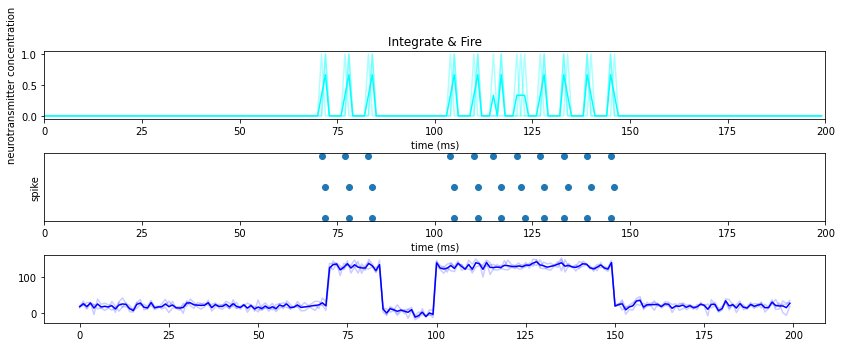

In [4]:
LIF = LeakyMembrane(IntegrateAndFireSoma)

n = LIF(
    name='neuronsA',
    shape=(3,),
    dt=1.,
    analyzable=True,
)

a = Axon(
    terminal=[2],
    analyzable=True,
)

n.use(a)

simulate_and_plot(n, a, 'Integrate & Fire')